<a href="https://colab.research.google.com/github/jsooyoun/Deliverable2/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.frame

iris.keys()
iris['frame']

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
(X1, X2, y1, y2) = train_test_split(X, y, test_size=0.2, random_state=37)

import pandas as pd
training = pd.concat([X1, y1], axis=1)
training

y1

,target
3,0
146,2
79,1
40,0
136,2
...,...
122,2
22,0
76,1
107,2


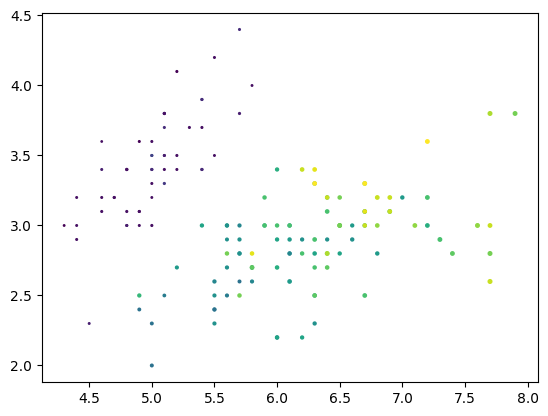

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], X['petal length (cm)'], X['petal width (cm)'])

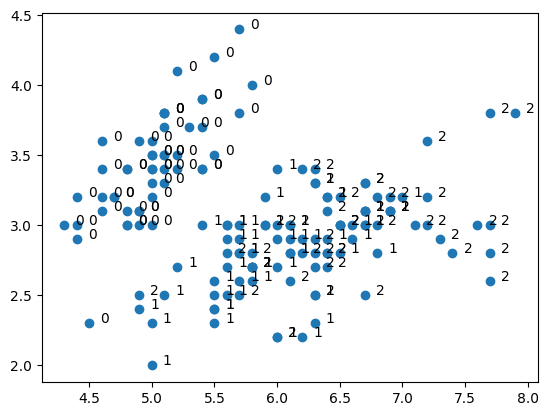

In [ ]:
col1 = X['sepal length (cm)']
col2 = X['sepal width (cm)']

plt.scatter(col1, col2)
for i in range(len(y)):
  plt.annotate(y[i], xy = (col1[i], col2[i]), xytext = (8,0), textcoords = 'offset points')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X1,y1)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
test_yhat = clf.predict(X2)
series = pd.Series(test_yhat, y2)
series

,0
target,
1,1
0,0
2,2
2,2
0,0
1,1
0,0
2,2
2,2


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y2, test_yhat)

0.9666666666666667

In [ ]:
y1.value_counts()

,count
target,
1,42
0,41
2,37


The most common class in the training set is 1, or versicolor



In [ ]:
y2.value_counts()
8/30

0.26666666666666666

I would only make a right prediction on about 27% of the test data.

In [ ]:
iris.data
X = iris.data.iloc[:, :2]
X
y = iris.target

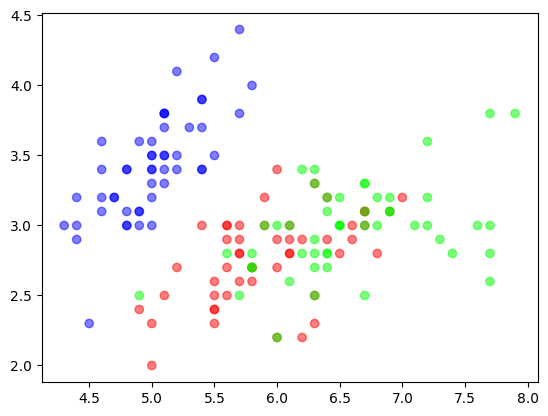

In [ ]:
col1 = X.iloc[:, 0]
col2 = X.iloc[:, 1]
plt.scatter(col1, col2, c=y, cmap='brg', alpha=0.5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

test_yhat = clf.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, test_yhat)

0.92

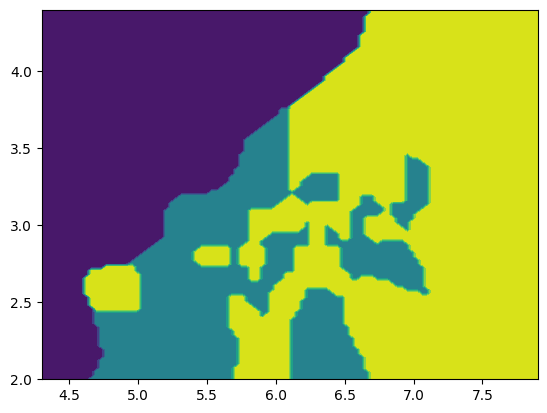

In [ ]:
import numpy as np

u = np.linspace(col1.min(), col1.max(), 100)
v = np.linspace(col2.min(), col2.max(), 100)
(u, v) = np.meshgrid(u, v)
test = pd.DataFrame({'sepal length (cm)': u.flatten(), 'sepal width (cm)': v.flatten()})
z = clf.predict(test)
z = z.reshape(100, 100)
plt.contourf(u,v,z)

cmap_brg = plt.cm.brg

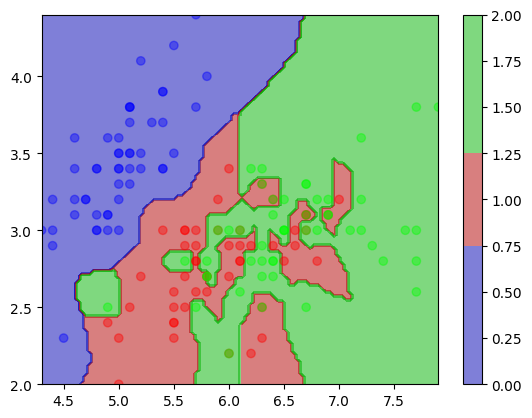

In [ ]:
from matplotlib.colors import ListedColormap

cmap_brg = plt.cm.brg
light_colors = cmap_brg(np.linspace(0, 1, 3))
light_colors = light_colors * 0.7
light_cmap = ListedColormap(light_colors)
plt.contourf(u, v, z, alpha=0.5, cmap=light_cmap)
plt.colorbar()
plt.scatter(col1, col2, c=y, cmap='brg', alpha=0.4)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0, force_alpha=True)

#col1 col2 each into own dataframe

clf.fit(X,y)

MultinomialNB(alpha=0)

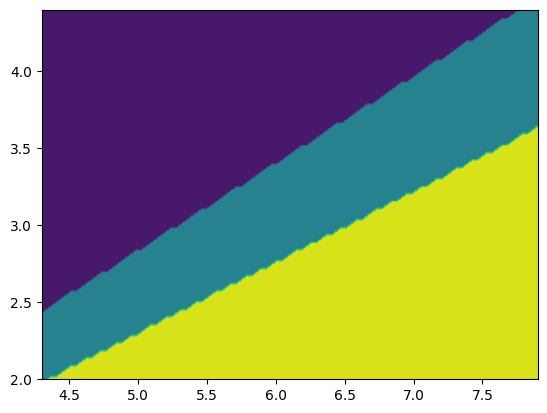

In [ ]:
test_yhat = clf.predict(X)

u = np.linspace(col1.min(), col1.max(), 100)
v = np.linspace(col2.min(), col2.max(), 100)
(u, v) = np.meshgrid(u, v)
test = pd.DataFrame({'sepal length (cm)': u.flatten(), 'sepal width (cm)': v.flatten()})
z = clf.predict(test)
z = z.reshape(100, 100)
plt.contourf(u,v,z)

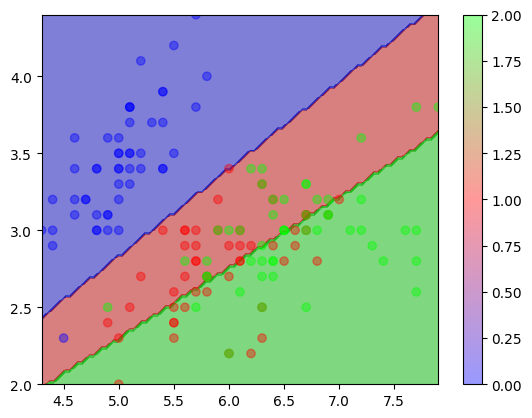

In [ ]:
cmap_brg = plt.cm.brg
light_colors = cmap_brg(np.linspace(0, 1, 3))
light_colors = light_colors * 0.7
light_cmap = ListedColormap(light_colors)
plt.contourf(u, v, z, alpha=0.5, cmap=light_cmap)
plt.scatter(col1, col2, c=y, cmap='brg', alpha=0.4)
plt.colorbar()
plt.show()

The boundaries are much more linear and cleanly defined.